In [115]:
# !pip install missingno
# !pip install geopy

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
AirbnbBerlin_df = pd.read_csv('/content/drive/My Drive/Airbnb/Airbnb Berlin.csv', index_col=0)
df_EDA = pd.read_csv('/content/drive/My Drive/Airbnb/df_EDA.csv', index_col=0)

In [119]:
df = df_EDA.copy()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23460 entries, 0 to 23459
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  23460 non-null  int64  
 1   Listing ID             23460 non-null  int64  
 2   Accomodates            23460 non-null  float64
 3   Accuracy Rating        18862 non-null  float64
 4   Bathrooms              23431 non-null  float64
 5   Bedrooms               23440 non-null  float64
 6   Beds                   23426 non-null  float64
 7   Checkin Rating         18844 non-null  float64
 8   Cleanliness Rating     18866 non-null  float64
 9   Communication Rating   18860 non-null  float64
 10  Guests Included        23460 non-null  float64
 11  Host ID                23460 non-null  float64
 12  Latitude               23460 non-null  float64
 13  Location Rating        18845 non-null  float64
 14  Longitude              23460 non-null  float64
 15  Min Nig

In [121]:
select_cols = ['Price', 'Reviews', 'Overall Rating', 'Bedrooms', 'Bathrooms', 'Beds', 'Accomodates']

# EDA - Explenatory Data Analysis

# EDA - Explenatory Data Analysis - GPT

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23460 entries, 0 to 23459
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  23460 non-null  int64  
 1   Listing ID             23460 non-null  int64  
 2   Accomodates            23460 non-null  float64
 3   Accuracy Rating        18862 non-null  float64
 4   Bathrooms              23431 non-null  float64
 5   Bedrooms               23440 non-null  float64
 6   Beds                   23426 non-null  float64
 7   Checkin Rating         18844 non-null  float64
 8   Cleanliness Rating     18866 non-null  float64
 9   Communication Rating   18860 non-null  float64
 10  Guests Included        23460 non-null  float64
 11  Host ID                23460 non-null  float64
 12  Latitude               23460 non-null  float64
 13  Location Rating        18845 non-null  float64
 14  Longitude              23460 non-null  float64
 15  Min Nig

I've conducted an exploratory data analysis (EDA) on your dataset, covering:

1. Missing Values Analysis: Visualized the missing values in a heatmap and bar chart.
2. Summary Statistics: Displayed key statistics for numerical columns.
3. Numerical Feature Distributions: Plotted histograms for features like price, reviews, ratings, and accommodations.
4. Correlation Analysis: Generated a heatmap to highlight relationships between numerical variables.
5. Categorical Feature Analysis: Visualized the distribution of key categorical variables.

### Summary statistics

In [123]:
# Proceeding without missingno, using alternative visualization

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              index    Listing ID   Accomodates  Accuracy Rating  \
count  23460.000000  2.346000e+04  23460.000000     18862.000000   
mean   11754.327664  1.776376e+07      2.668031         9.680946   
std     6792.546631  9.885711e+06      1.550610         0.733149   
min        0.000000  2.695000e+03      1.000000         2.000000   
25%     5872.750000  9.027520e+06      2.000000        10.000000   
50%    11746.500000  1.871969e+07      2.000000        10.000000   
75%    17631.250000  2.584214e+07      3.000000        10.000000   
max    23535.000000  3.468232e+07     16.000000        10.000000   

          Bathrooms      Bedrooms          Beds  Checkin Rating  \
count  23431.000000  23440.000000  23426.000000    18844.000000   
mean       1.095088      1.160154      1.640101        9.728826   
std        0.341949      0.654637      1.219281        0.695025   
min        0.000000      0.000000      0.000000        2.000000   
25%        1.000000      1.00000

## Missing values

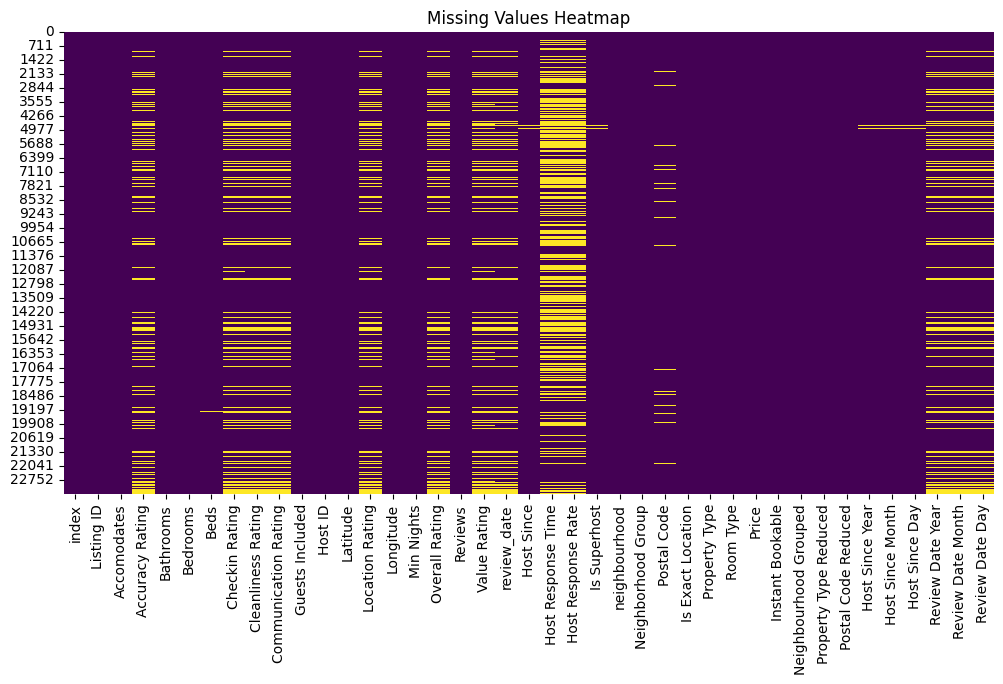

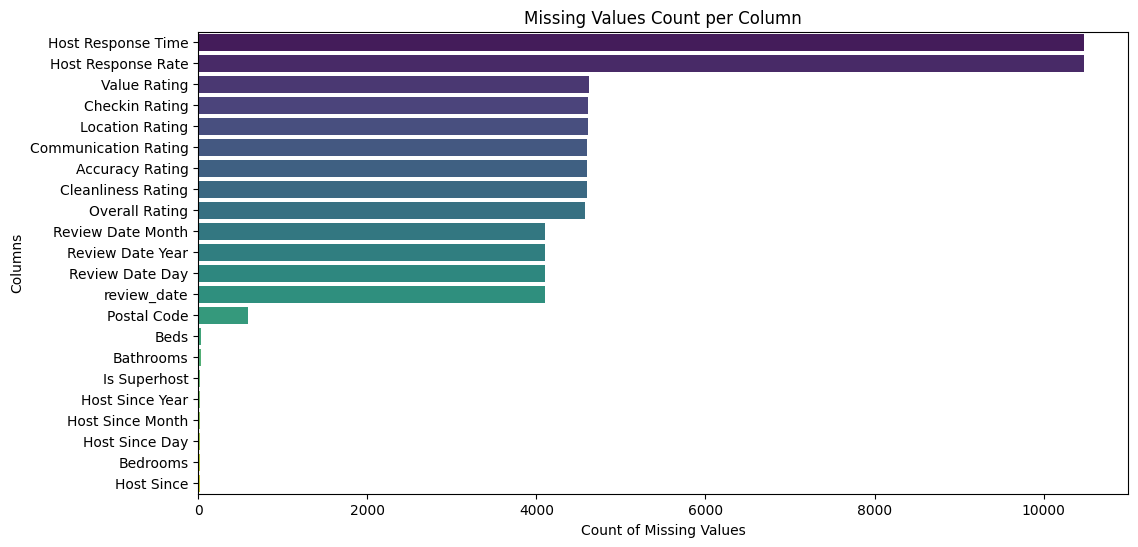


Missing Values:
Host Response Time      10476
Host Response Rate      10476
Value Rating             4618
Checkin Rating           4616
Location Rating          4615
Communication Rating     4600
Accuracy Rating          4598
Cleanliness Rating       4594
Overall Rating           4572
Review Date Month        4108
Review Date Year         4108
Review Date Day          4108
review_date              4108
Postal Code               585
Beds                       34
Bathrooms                  29
Is Superhost               20
Host Since Year            20
Host Since Month           20
Host Since Day             20
Bedrooms                   20
Host Since                 20
dtype: int64


In [124]:
# Check for missing values
missing_values = df.isnull().sum()

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Display missing values as a bar chart
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Values Count per Column")
plt.show()


print("\nMissing Values:")
print(missing_values)

## Checking the distribution of key numerical features

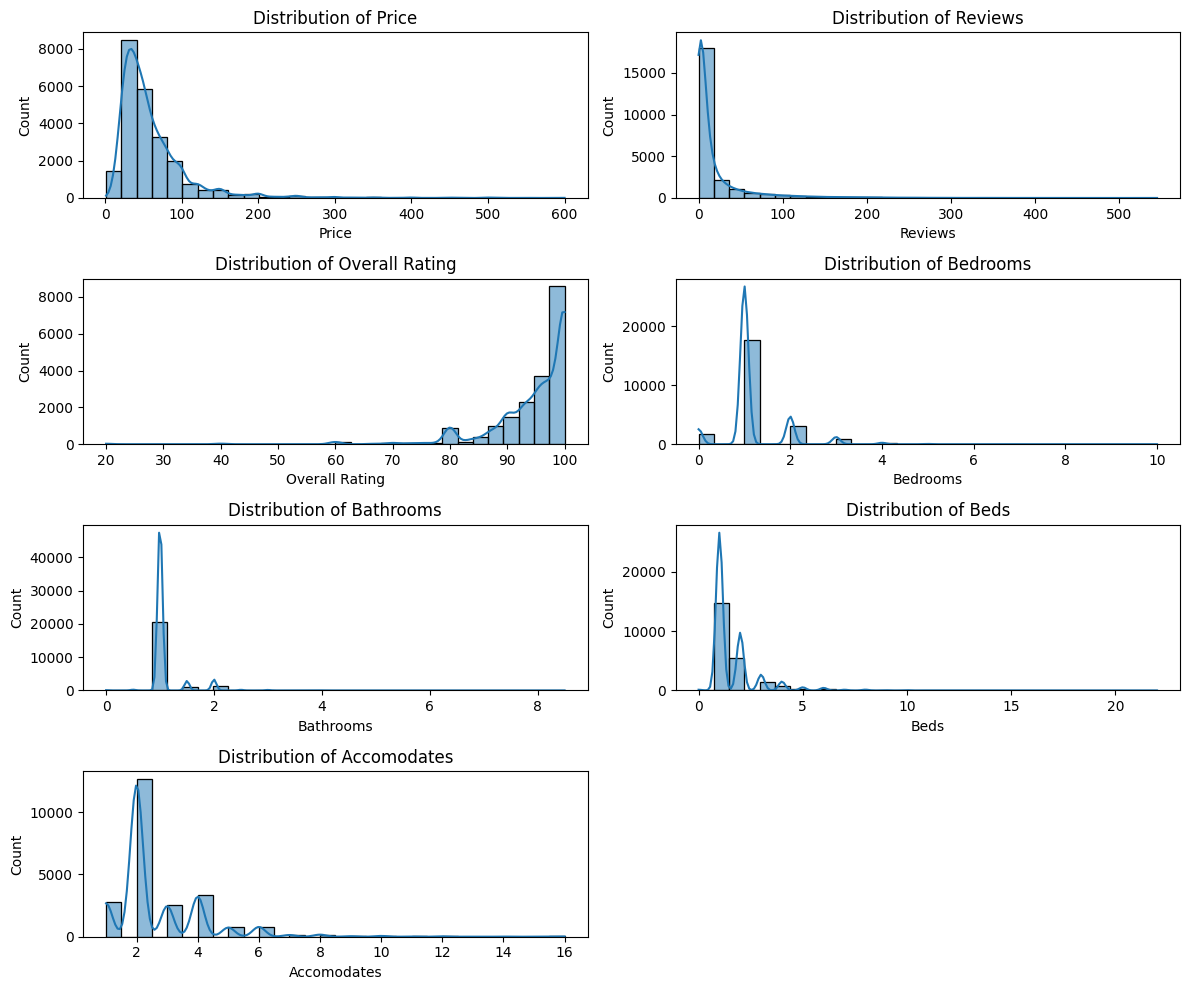

In [125]:
# Checking the distribution of key numerical features
numerical_columns = [
    "Price", "Reviews", "Overall Rating", "Bedrooms", "Bathrooms", "Beds", "Accomodates"
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## Checking correlations among numerical features

In [126]:
df = df[df['Price'] < 600]

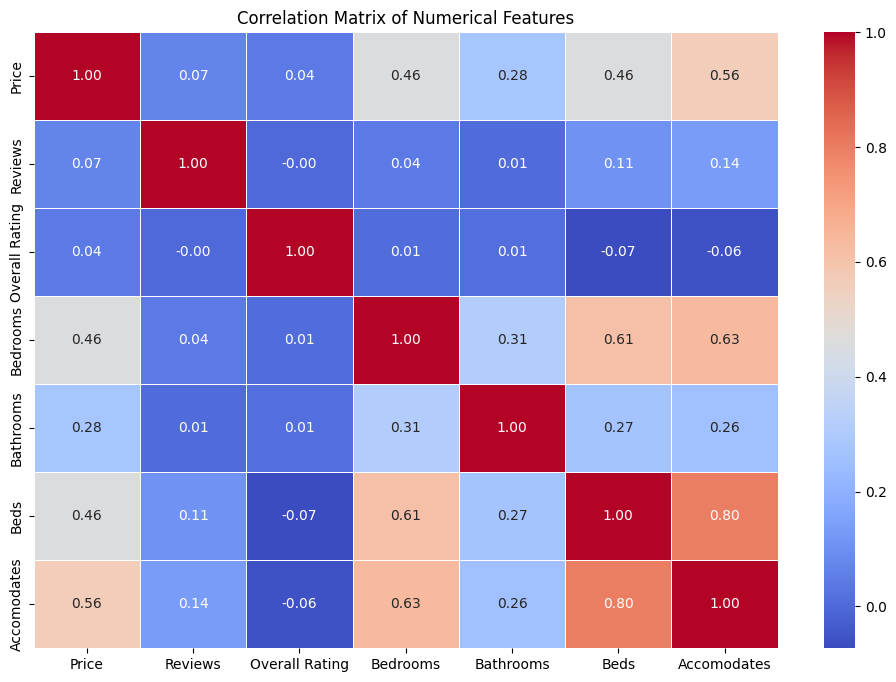

In [127]:
# Checking correlations among numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## Visualizing categorical feature distributions

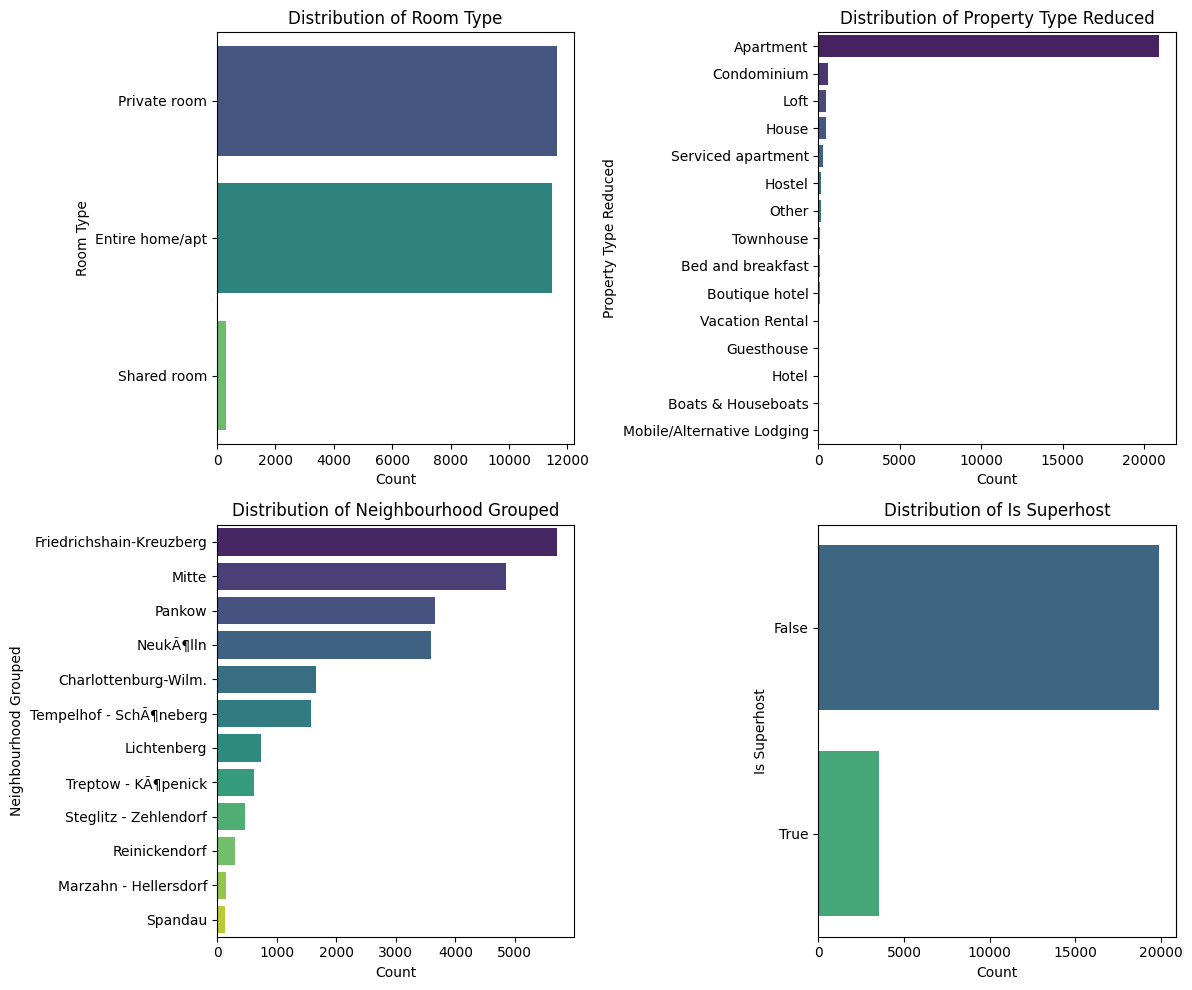

In [128]:
# Visualizing categorical feature distributions

categorical_columns = ["Room Type", "Property Type Reduced", "Neighbourhood Grouped", "Is Superhost"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")

plt.tight_layout()
plt.show()


In [129]:
Is_Superhost = AirbnbBerlin_df['Is Superhost'].value_counts()
superHost = (Is_Superhost.loc['t']/(Is_Superhost.loc['f'] + Is_Superhost.loc['t'])) * 100
print(f"superHost: {superHost: 0.2f}")

df_EDA_Is_Superhost = df_EDA['Is Superhost'].value_counts()
df_EDA_Is_Superhost
df_EDA_SuperHost = (df_EDA_Is_Superhost.iloc[1]/(df_EDA_Is_Superhost.iloc[0] + df_EDA_Is_Superhost.iloc[1])) * 100
print(f"df_EDA_superHost: {df_EDA_SuperHost: 0.2f}")


superHost:  41.53
df_EDA_superHost:  15.18


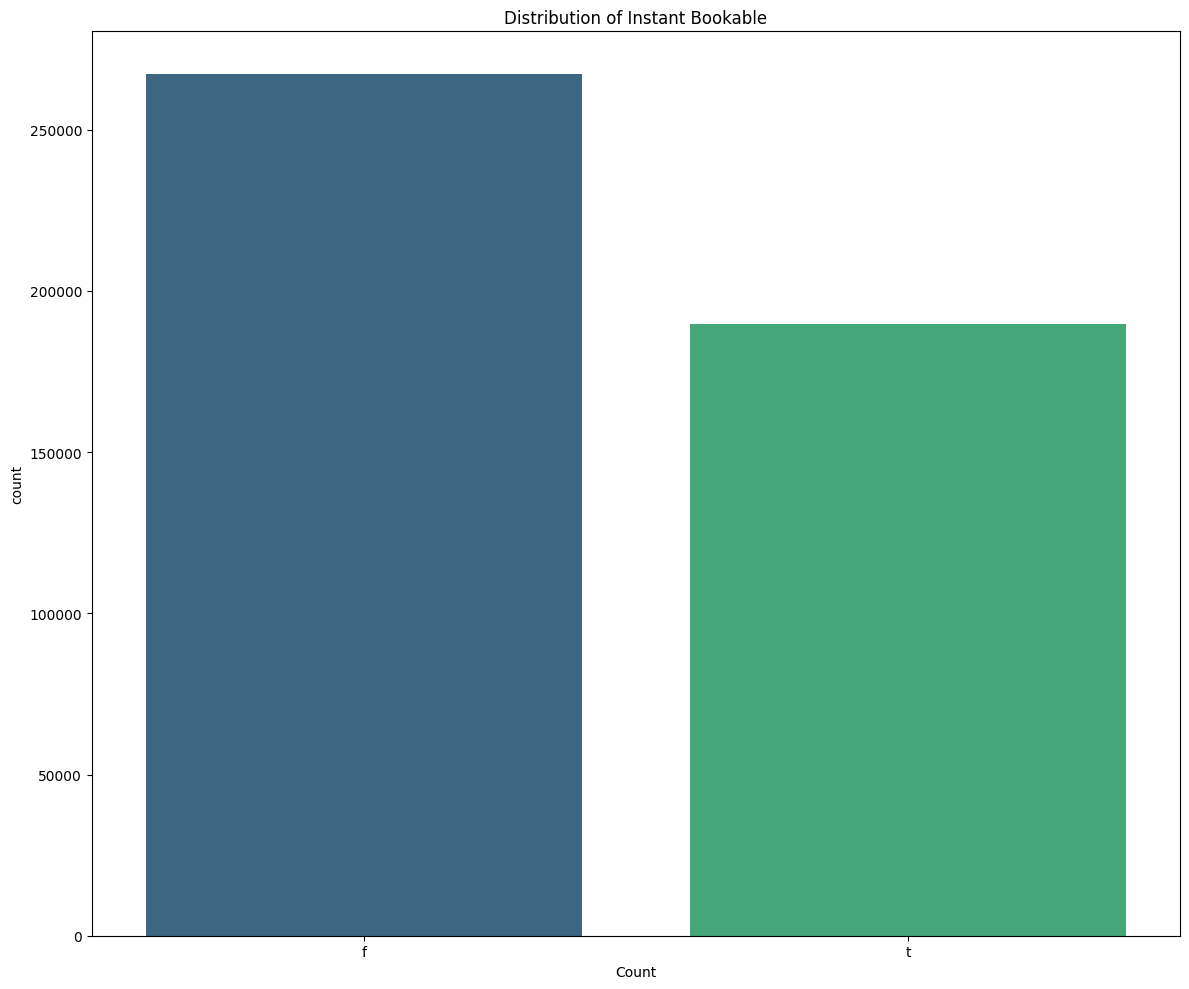

In [130]:
plt.figure(figsize=(12, 10))
sns.countplot(data=AirbnbBerlin_df, x='Is Superhost', palette="viridis")
plt.title(f"Distribution of Instant Bookable")
plt.xlabel("Count")

plt.tight_layout()
plt.show()

# Outliers

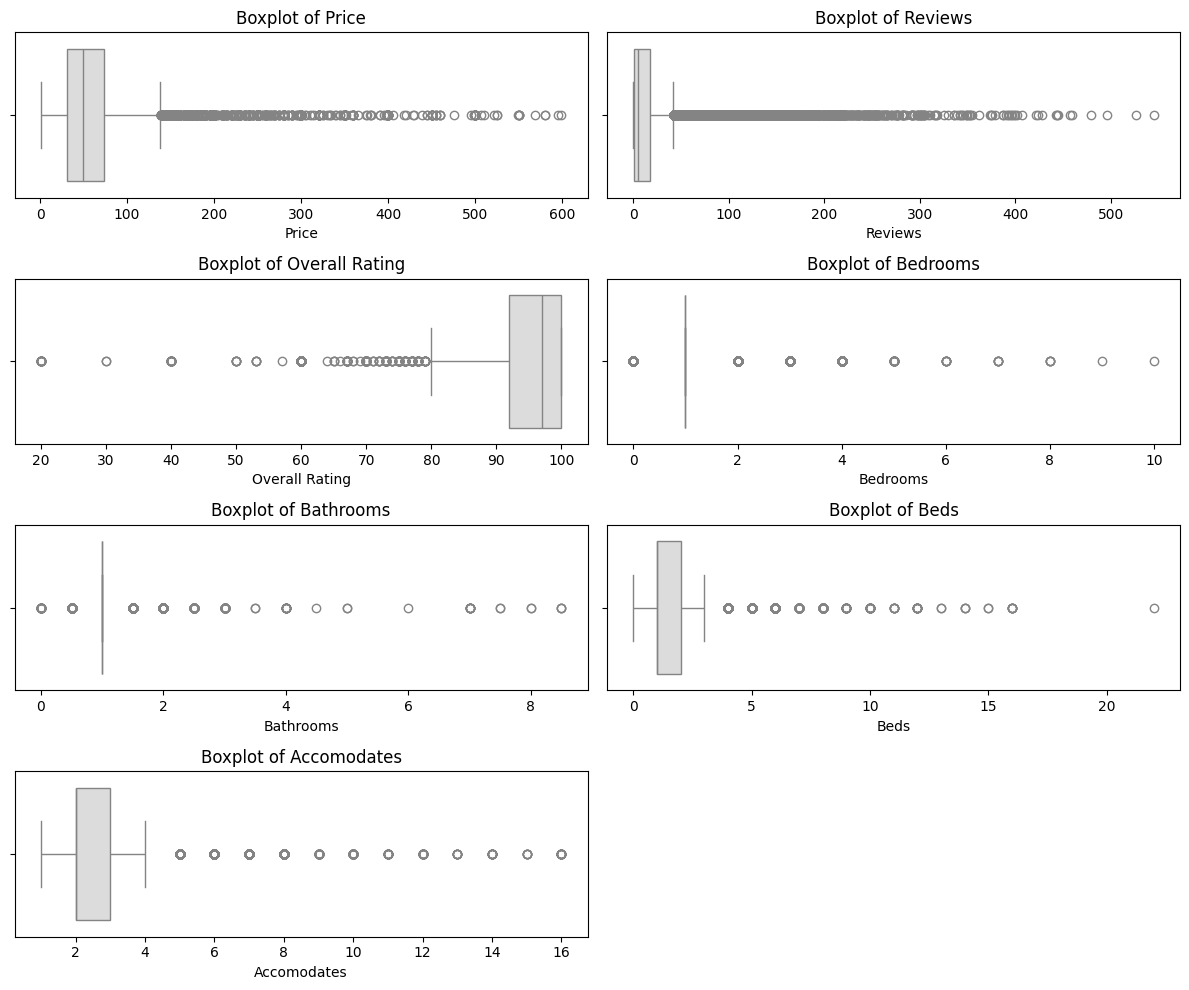

In [131]:
# Outlier detection using boxplots for key numerical features
# Selecting key numerical columns for outlier detection
numerical_columns = [
    "Price", "Reviews", "Overall Rating", "Bedrooms", "Bathrooms", "Beds", "Accomodates"
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col].dropna(), palette="coolwarm")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


The boxplots reveal potential outliers in several numerical features, particularly:

1. Price: Likely contains extreme values (high-end listings or pricing errors).
2. Reviews: Some listings have significantly higher review counts than others.
3. Bedrooms, Bathrooms, Beds, Accommodates: Some properties might have unrealistic values (e.g., too many or too few bedrooms relative to accommodations).

### Outlier removal

In [132]:
# Implementing Outlier Removal using the IQR Method

def remove_outliers(df, column):
    """Removes outliers based on IQR for a given column."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying outlier removal to selected numerical columns
cleaned_df = df.copy()
for col in ["Price", "Reviews", "Bedrooms", "Bathrooms", "Beds", "Accomodates"]:
    cleaned_df = remove_outliers(cleaned_df, col)

# Displaying summary after outlier removal
print(f"Cleaned Dataset After Outlier Removal\n {cleaned_df}")

Cleaned Dataset After Outlier Removal
        index  Listing ID  Accomodates  Accuracy Rating  Bathrooms  Bedrooms  \
0          0        2695          2.0             10.0        1.0       1.0   
20        20       35152          2.0              9.0        1.0       1.0   
28        28       41306          2.0             10.0        1.0       1.0   
32        32       44083          2.0              9.0        1.0       1.0   
37        37       48955          2.0              NaN        1.0       1.0   
...      ...         ...          ...              ...        ...       ...   
23446  23522    34672106          2.0              NaN        1.0       1.0   
23447  23523    34672629          2.0              NaN        1.0       1.0   
23449  23525    34674496          2.0              NaN        1.0       1.0   
23450  23526    34675305          2.0              NaN        1.0       1.0   
23454  23530    34677601          2.0              NaN        1.0       1.0   

       Beds 

I have removed outliers from key numerical features (Price, Reviews, Bedrooms, Bathrooms, Beds, Accommodates) using the IQR method. The cleaned dataset is now available for further analysis.

# Feature Engineering

Feature Engineering Suggestions
To enhance the dataset and improve model performance, consider:

1. Handling Outliers
 - Use log transformation for skewed features like Price and Reviews to reduce the impact of extreme values.
 - Use IQR (Interquartile Range) method to remove or cap outliers in Price, Bedrooms, Bathrooms, etc.
2. Creating New Features
 - Price Per Person: Price / Accommodates
 - Host Experience: Convert Host Since Year to Years of Hosting = Current Year - Host Since Year
 - Review Activity: Reviews / (Last Review Year - First Review Year + 1) to measure review frequency.
 - Availability Score: Based on the number of reviews and overall rating.
3. Encoding Categorical Variables
 - Convert Room Type, Property Type, Neighbourhood Grouped into one-hot encoded or label encoded features for ML models.
 - Convert Is Superhost and Instant Bookable into binary (0/1) values.

In [133]:
from datetime import datetime

# Making a copy of the cleaned dataset to work on feature creation
df_features = cleaned_df.copy()

# Feature 1: Price per Person
df_features["Price Per Person"] = df_features["Price"] / df_features["Accomodates"]

# Feature 2: Years of Hosting
current_year = datetime.now().year
df_features["Years of Hosting"] = current_year - df_features["Host Since Year"]

# Feature 3: Review Frequency (Reviews per Year since First Review)
df_features["Review Frequency"] = df_features["Reviews"] / ((df_features["Last Review Year"] - df_features["First Review Year"]).replace(0, 1))

# Feature 4: Availability Score (Normalized Reviews * Rating)
df_features["Availability Score"] = df_features["Reviews"] * df_features["Overall Rating"]

# Feature 5: Encoding 'Is Superhost' into Binary (1 for 't', 0 for 'f')
df_features["Is Superhost Binary"] = df_features["Is Superhost"].map({"t": 1, "f": 0})

# Feature 6: Encoding 'Instant Bookable' into Binary
df_features["Instant Bookable Binary"] = df_features["Instant Bookable"].astype(int)

# Display the dataset with newly engineered features
df_features


KeyError: 'Last Review Year'